<font color='blue'><h1>Introdução Prática ao PyTorch</h1></font>
<font color='0471A6'><h2>Loop de Treinamento em Pytorch (com um exemplo simples de Regressão Linear)</h2></font>

<font color='0471A6'><h2>Loop de Otimização no PyTorch</h2></font>

- O modelo é treinado / otimizado em um loop de otimização
- Cada iteração será uma época
- Cada época contém duas partes principais:
  - Loop de treinamento
    - iteração sobre o conjunto de treinamento
  - Loop de validação
    - iteração sobre o conjunto de validação

<font color='0471A6'><h3>Exemplo: Regressão Linear com Pytorch</h3></font>

<h4>Pipeline Típico em Pytorch</h4>

* Modelagem da Rede (Entrada, Saída, passo Forward)
* Definição da Função de Custo e do Otimizador
* Loop de Treinamento
  * Passo Forward (cômputo da predição e custo)
  * Passo Backward (cômputo dos gradientes)
  * Atualização dos Pesos

In [3]:
import torch 

# Exemplo 1 de Regressão Linear com BackPropagation 

# Treinamento em Pytorch f(x) = 2*x
X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(X):
  return w * X

def loss(y, y_pred):
  return ((y-y_pred)**2).mean()

# Training
learning_rate = 0.01
n_epochs = 25
for epoch in range(n_epochs):
  y_pred = forward(X)
  l = loss(Y, y_pred)
  l.backward() # calcu la os gradientes 

  # atualiza os pesos
  # apenas atualizar os pesos 
  # (sem incluir esta operação no cálculo do gradiente)
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zera os gradientes após o update
  w.grad.zero_()

  if (epoch+1) % 5 == 0:
    print(f'epoch {epoch+1} loss: {l.item():.5f}')

# teste
forward(5.0).item()

epoch 5 loss: 0.33898
epoch 10 loss: 0.00027
epoch 15 loss: 0.00000
epoch 20 loss: 0.00000
epoch 25 loss: 0.00000


10.0

In [6]:
# Exemplo 2 de Regressão Linear com BackPropagation 
# Utiliza algumas estruturas fundamentais do PyTorch

import torch
import torch.nn as nn

X = torch.tensor([ [1],[2],[3],[4],[5],[6],[7],[8] ], dtype=torch.float32)
Y = torch.tensor([ [2],[4],[6],[8],[10],[12],[14],[16] ], dtype=torch.float32)

class RegressaoLinear(nn.Module):
  def __init__(self):
    super(RegressaoLinear, self).__init__()
    self.layer = nn.Linear(1, 1)
  def forward(self, x):
    return self.layer(x)

model = RegressaoLinear()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
  # obtém as predições do modelo
  y_predicted = model(X)
  # calcula o custo
  l = loss(Y, y_predicted)
  # calcula os gradientes (passo backward)
  l.backward()
  # atualiza os pesos
  optimizer.step()
  # zera os gradientes após a atualização
  optimizer.zero_grad()
  if (epoch+1)%10 == 0:
    w,b = model.parameters()
    print(epoch+1, w[0][0].item(), l.item())

# Teste
X_test = torch.tensor([5], dtype=torch.float32)
print(model(X_test))

10 1.9112434387207031 0.0501398928463459
20 1.9162791967391968 0.045992206782102585
30 1.9195630550384521 0.04245591163635254
40 1.9227173328399658 0.03919147327542305
50 1.9257478713989258 0.0361780971288681
60 1.9286595582962036 0.03339628502726555
70 1.9314570426940918 0.030828483402729034
80 1.9341448545455933 0.028458114713430405
90 1.9367272853851318 0.026270005851984024
100 1.9392085075378418 0.0242500938475132
tensor([10.0378], grad_fn=<ViewBackward0>)


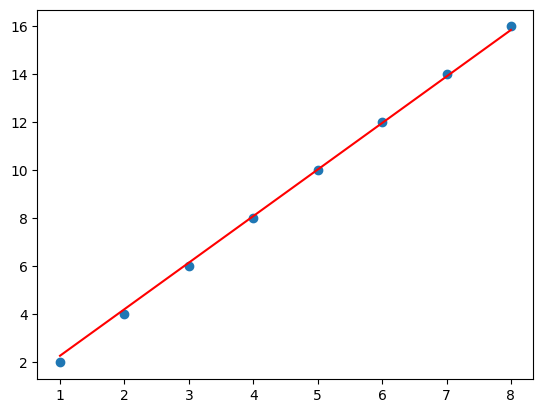

In [7]:
import matplotlib.pyplot as plt
w,b = model.parameters()
w = w.detach().numpy()
b = b.detach().numpy()

plt.scatter(X.numpy(), Y.numpy())
plt.plot(X.numpy(), w*X.numpy()+b, 'r')
plt.show()